# Assignment 1
## Applied Machine Learning (BUAN 6341)


Deliverables:

- Submit your answers to conceptual questions (described in another .pdf file) in a pdf file.
- Write down your codes and discussions in the given cells described in this file.
    - Cells for coding are denoted as "YOUR CODE HERE" 
    - Cells for discussions are denoted as "YOUR DISCUSSIONS HERE". Include "#" before each line of your discussions to comment out your wordings (i.e., not considered as code).
    - If you need more cells to check temporary results, add a cell using the "+" button or shortcut "esc + b".
- Submit two files: .pdf, and .ipynb to elearning.

In [1]:
NAME = "Farzan"

### Meet the Data and the Setting

##### Background  
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles.

##### The Dataset

We will be using the daily version of the Capital Bikeshare System dataset from the UCI Machine Learning Repository. This data set contains information about the daily count of bike rental checkouts in Washington, D.C.’s bikeshare program between 2011 and 2012. It also includes information about the weather and seasonal/temporal features for that day (like whether it was a weekday).
- **day:** Day of the record (relative to day 1:2011-01-01)
- **season:** Season (1:spring, 2:summer, 3:fall, 4:winter)
- **weekday:** Day of the week (0=Sunday, 6=Saturday)
- **workingday:** If day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit:**<br>
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds
- **temp:** Normalized temperature in Celcius
- **windspeed:** Normalized wind speed
- **casual:** Count of checkouts by casual/non-registered users
- **registered:** Count of checkouts by registered users
- **cnt:** Total checkouts

##### Practice Prep
The cells below imports basic packages as well as the bike-sharing dataset. The original dataset is loaded as Pandas DataFrame, and is named as 'daily'. Run and read through the cells below to obtain a general understanding of the data.

In [2]:
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
daily = pd.read_csv("day.csv")
daily.head()

,day,season,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
0,1,1,6,0,2,0.344167,0.160446,331,654,985
1,2,1,0,0,2,0.363478,0.248539,131,670,801
2,3,1,1,1,1,0.196364,0.248309,120,1229,1349
3,4,1,2,1,1,0.200000,0.160296,108,1454,1562
4,5,1,3,1,1,0.226957,0.186900,82,1518,1600


In [ ]:
print(daily.columns)

**Question 1 : Data Exploration.** (20 points)

- Plot the daily count of bikes that were checked out by **casual/non-registered** users (y) against the temperature (x). 
- Set the color based on whether it is a working day. Set transparency to 0.7. 
- Include appropriate labels for x-axis and y-axis, and colorbar. *Hint: use plt.colorbar(ticks = [0,1]) to change the ticks.*
- What insights can you get?

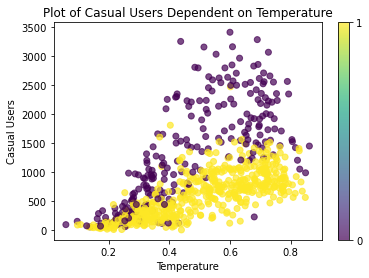

In [23]:
## Plot of temperature vs casual users
plt.scatter('temp', 'casual',data = daily, alpha = 0.7, c = 'workingday')
plt.xlabel('Temperature')
plt.ylabel('Casual Users')
plt.title('Plot of Casual Users Dependent on Temperature')
plt.colorbar(ticks = [0, 1])

On weekdays, the number of users is considerably lower on average than on weekends. Another interesting trend is that the number of casual users increases on both weekends and weekdays as the temperature rises to a value of 0.6, after which fewer people use the service. 

## Regression

In this section, you are supposed to complete THREE regression models, some in conjunction with grid search and CV. First, run the cells below to complete the data splitting step. 

In [24]:
# Define X and y
var = ['temp','windspeed','season', 'weekday', 'workingday', 'weathersit']
X = daily[var]
y = daily['cnt']

In [48]:
# Data splitting for training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

**Question 2: Linear Regression (30 pts)**

- Train a linear regression model. Report and specify clearly the estimated coefficients and intercept.   
  *Hint: use print function to specify the result reported is the intercept.*
- Obtain and use print function to report the R-squared value for (1) the training set, and (2) the test set. 
- We have obtained two R-squared values. Which one is larger? Which one demonstrates a better performance? Which one should we report as the unbiased performance measure?
- Obtain the predicted y for (1) the training set and (2) the test set. Store them properly
- Calculate and use print function to report (1) the MAE for training set, and (2) the MAE for test set.  

In [49]:
# Train the model and report coefficients
# Initiating linear regression
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)
print("The coefficients of the linear regression are: \n", linearreg.coef_, "\n The intercept is: \n", linearreg.intercept_)

The coefficients of the linear regression are: 
 [ 5245.48567189 -1995.73565252   412.66281476    76.77426589
   132.20982981  -800.60943777] 
 The intercept is: 
 2093.4087280168706


In [50]:
## Get R-squared value for training and test set
print("The R-squared value for the training set is:", linearreg.score(X_train, y_train))
print("The R-squared value for the test set is:", linearreg.score(X_test, y_test))

The R-squared value for the training set is: 0.49817540095276036
The R-squared value for the test set is: 0.5285823895780065


The R-squared value is fairly low, indicating that the input variables explain 52.9% of the output value. Another thing to note is that the test R-squared value is higher than the training value. This could be either due to chance or some other factors.

To determine whether the test value is not higher solely due to chance, it is important to run cross-validation. 

In [60]:
## Obtain predicted ys
y_train_pred = linearreg.predict(X_train)
y_test_pred = linearreg.predict(X_test)

In [90]:
## Obtain and report MAE
# MAE train 
err_y_train = y_train - y_train_pred

err_y_test =  y_test - y_test_pred
print("The MAE for the training set is:", np.mean(np.abs(err_y_train)))
print("The MAE for the test set is:", np.mean(np.abs(err_y_test)))

The MAE for the training set is: 1161.1887574080558
The MAE for the test set is: 1152.4435945911378


**Question 3: Polynomial Regression (30 pts)**

- Train a Polynomial regression model with grid search and 10-fold cross-validation. Let the grid of the hyperparameter be: [1,2,3]. Leave other parameters as default.
- Obtain the predicted value for (1) the training set and (2) the test set. Then calculate the MSE for (1) the training set and (2) the test set. *Hint: here, the predicted value are obtained based on the best model (i.e., model with the chosen hyperparameter).*
- Obtain and report the model's test score (i.e., R-squared value).
- Compare the test R-squared between the current model and the test R-squared value you obtained from Question 2. What do you find? Given this result, without running additional syntax, what is your guess of the value of the chosen hyperparameter? Explain briefly. 

In [117]:
## Train the model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

# Initiating linear regression
lr = LinearRegression()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Transforming the data for polynomial regression
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Training the data
lr.fit(X_train_poly, y_train)

# Predicting y_test_poly
y_train_poly_pred = lr.predict(X_train_poly)
y_test_poly_pred = lr.predict(X_test_poly)

In [118]:
## Calculate and report the MSEs
E_train = y_train - y_train_poly_pred
MSE_train = np.mean(E_train**2)

E_test = y_test - y_test_poly_pred
MSE_test = np.mean(E_test**2)

print("The MSEs are:\nTraining set:", MSE_train, "\nTest set:", MSE_test)

The MSEs are:
Training set: 1.080513802150778 
Test set: 3.196032343995449e+19


In [136]:
## Obtain the test R-squared
from sklearn.model_selection import GridSearchCV

# Setting up cross validation
cross_val = KFold(n_splits = 10, shuffle = True, random_state = 42)

# Creating a pipeline 
poly_transfer = PolynomialFeatures(degree = 3)
my_poly_reg = make_pipeline(poly_transfer, lr)

# Setting up GridSearchCV
param_grid = {'polynomialfeatures__degree': [1, 2, 3]} 
grid_search = GridSearchCV(estimator = my_poly_reg, param_grid = param_grid, cv = cross_val)

poly_grid = PolynomialFeatures()
my_lr_grid = LinearRegression()

my_poly_grid_reg = make_pipeline(poly_grid, my_lr_grid)
grid_search = GridSearchCV(estimator = my_poly_reg, param_grid = param_grid, cv = cross_val)

# Fitting the model with grid search and cross-validation
grid_search.fit(X_train, y_train)

# Prediction
grid_search.predict(X_test)

array([5724.875  , 1742.84375, 4393.0625 , 3437.34375, 6118.03125,
       6190.6875 ,  934.5    , 3893.40625, 6712.5    , 5184.21875,
       1719.375  , 5441.96875, 5857.5625 , 4255.6875 , 3145.0625 ,
       3090.125  , 3516.65625, 6837.625  , 6281.625  , 1484.4375 ,
       6367.09375, 4519.4375 , 4599.5    , 2677.4375 , 1673.03125,
       6271.28125, 2385.15625, 5731.875  , 2476.25   , 5046.53125,
       2353.875  , 5557.5    , 5493.     , 6323.78125, 5005.     ,
       4881.65625, 6861.375  , 5092.0625 , 4196.53125, 1400.21875,
       6011.03125, 2631.9375 , 6203.875  , 5397.65625, 5505.40625,
       1941.71875, 5308.03125, 4415.75   , 5792.25   , 3409.25   ,
       4807.75   , 3577.125  , 2940.09375, 5296.625  , 6065.5625 ,
       5882.71875, 7032.75   , 3665.3125 , 5581.9375 , 4736.59375,
       5155.1875 , 6316.90625, 2926.53125, 6810.28125, 5370.46875,
       5475.53125, 5670.53125, 5016.09375, 2822.875  , 5247.875  ,
       4391.625  , 3862.59375, 4397.46875, 5872.875  , 3710.12

In [138]:
# Discussion: R-squared value and optimal polynomial degree
grid_search.score(X_test, y_test)

0.5533901795874405

In [144]:
print(grid_search.best_params_, grid_search.best_score_ )

{'polynomialfeatures__degree': 3} 0.47325816558375405


Since the R-squared value of the current model is higher, we will use that model.